In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('churn_prepared.csv')
df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184


In [3]:
model = PCA(n_components = 11)
outcomes = model.fit_transform(df)

In [4]:
outcomes

array([[-1.53263903,  0.1195116 , -1.56211627, ..., -0.52762681,
         0.04565657, -0.02662184],
       [-1.6590187 ,  0.13053906,  0.63830102, ..., -0.82666911,
         1.30270444, -0.03835973],
       [-0.90052198,  1.19140244, -0.19308126, ...,  0.46644858,
        -0.29764917,  0.06082489],
       ...,
       [ 0.57881342,  0.79930524, -0.69355949, ..., -0.30391372,
         0.03266952, -0.08694925],
       [ 2.00278069, -1.5898536 ,  1.86008106, ..., -0.03906511,
         1.04576718, -0.06939983],
       [ 1.5517672 , -0.89884365,  2.1121719 , ..., -0.7902225 ,
         0.92758662, -0.03382088]])

In [5]:
loading = pd.DataFrame(outcomes, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.532639,0.119512,-1.562116,0.136206,0.414997,-1.399578,0.191106,-0.130913,-0.527627,0.045657,-0.026622
1,-1.659019,0.130539,0.638301,-1.375658,0.723705,-1.271899,0.575596,0.474031,-0.826669,1.302704,-0.038360
2,-0.900522,1.191402,-0.193081,-0.495760,1.308798,-1.158699,-0.434070,-0.004835,0.466449,-0.297649,0.060825
3,-0.942314,-1.138090,1.264619,0.039044,0.394403,0.898011,-1.516688,-0.434394,-0.730167,-0.734906,0.130009
4,-1.929748,-1.434578,-0.984405,1.102943,0.459296,0.611698,0.333212,-1.448501,-0.347708,0.279139,-0.056541
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.897402,0.789544,0.484892,-0.372859,-1.157516,1.016570,-0.920543,-0.197212,0.091115,0.591052,0.081237
9996,1.434856,-1.508304,2.101618,2.366782,0.867436,1.420222,1.171667,2.015353,1.829908,1.784128,-0.026353
9997,0.578813,0.799305,-0.693559,0.471070,-1.131182,-1.009988,-0.023901,0.482031,-0.303914,0.032670,-0.086949
9998,2.002781,-1.589854,1.860081,-0.311399,0.216009,-0.461117,0.605280,1.201074,-0.039065,1.045767,-0.069400


In [6]:
explained_variance = model.explained_variance_
explained_variance

array([1.99436896, 1.05744462, 1.02956846, 1.01874438, 1.00339009,
       0.9980171 , 0.9915275 , 0.97889558, 0.96418654, 0.9594893 ,
       0.00546758])

In [7]:
explained_ratio = model.explained_variance_ratio_
explained_ratio

array([0.18128814, 0.09612172, 0.09358777, 0.09260386, 0.09120816,
       0.09071975, 0.09012985, 0.08898161, 0.08764456, 0.08721758,
       0.000497  ])

In [8]:
var = explained_ratio * 100
Kaiser = pd.DataFrame(var.round(2), columns = ["PC with Captured Variance"], index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
Kaiser

,PC with Captured Variance
PC1,18.13
PC2,9.61
PC3,9.36
PC4,9.26
PC5,9.12
PC6,9.07
PC7,9.01
PC8,8.90
PC9,8.76
PC10,8.72


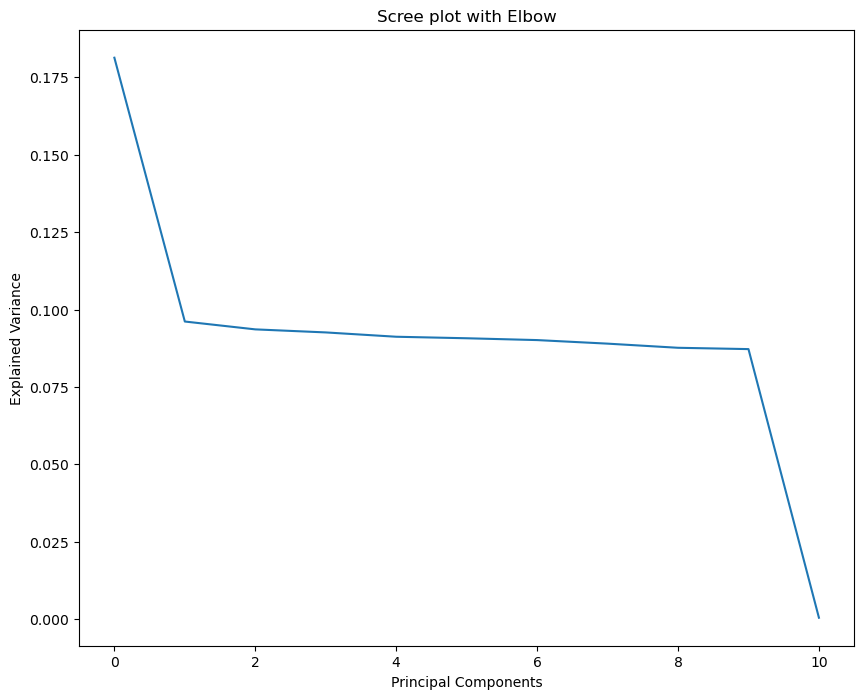

In [9]:
plt.figure(figsize = (10, 8))
plt.plot(explained_ratio)
plt.title('Scree plot with Elbow')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [10]:
total = sum(explained_variance)
print("Total variance is: ", total)

Total variance is:  11.001100110010993


In [20]:
total = Kaiser.loc['PC1':'PC2'].sum()
print("Total variance of the two PC's is: ", total)

Total variance of the two PC's is:  PC with Captured Variance    27.74
dtype: float64


In [11]:
print("Explained variance for each component: ", explained_variance)

Explained variance for each component:  [1.99436896 1.05744462 1.02956846 1.01874438 1.00339009 0.9980171
 0.9915275  0.97889558 0.96418654 0.9594893  0.00546758]


In [23]:
total = Kaiser.loc[['PC1', 'PC2'], 'PC with Captured Variance'].sum()
print("The total variance of the two chosen principal components: ", total)

The total variance of the two chosen principal components:  27.74
